In [1]:
import nrrd
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
from os import walk
import pickle
from tensorflow import keras

In [26]:
nrrd_path = "../data/processed/tensorflow_format_proba/DWI/DWI_11_283_exvivo_right_wi_D845.seg.nrrd"
data, header = nrrd.read(nrrd_path)

In [27]:
model = keras.models.load_model("../models/DWI.keras", compile=True)
predictions = model.predict(data)

/Users/jgray/miniforge3/envs/mri/lib/python3.11/site-packages/keras/src/trainers/trainer.py:212: UserWarning: Model doesn't support `jit_compile=True`. Proceeding with `jit_compile=False`.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 739ms/step


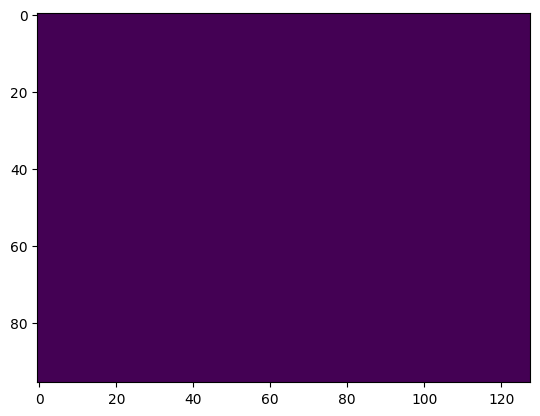

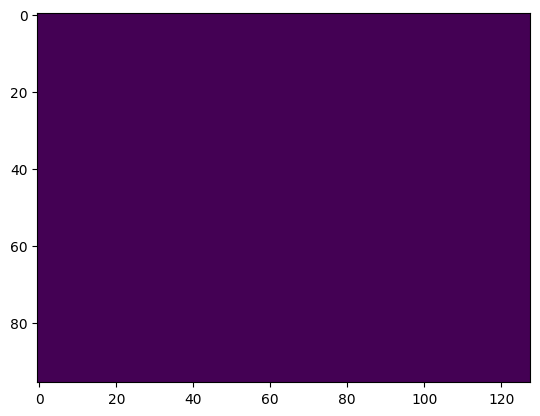

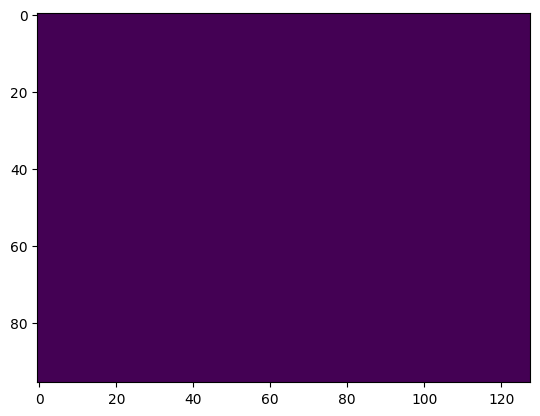

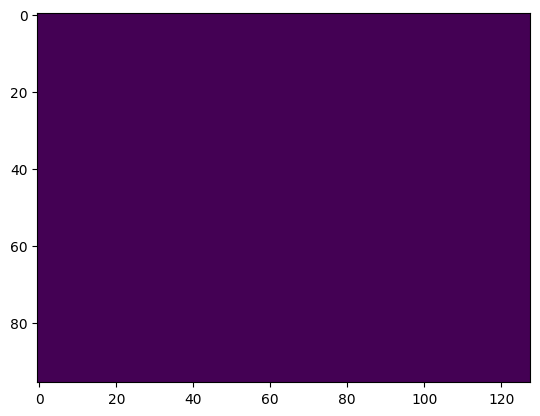

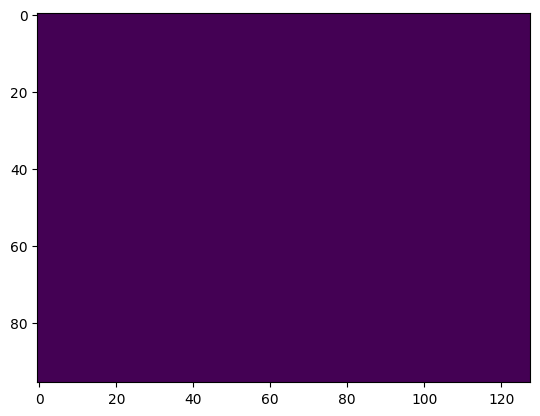

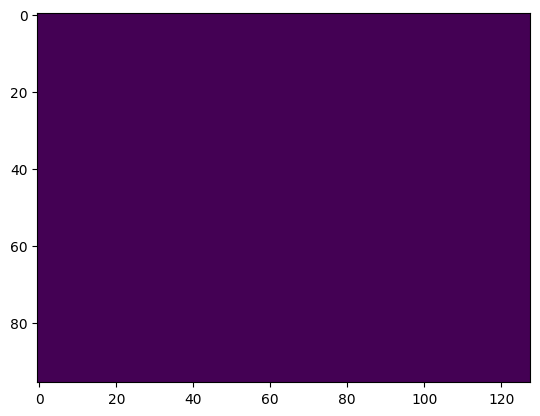

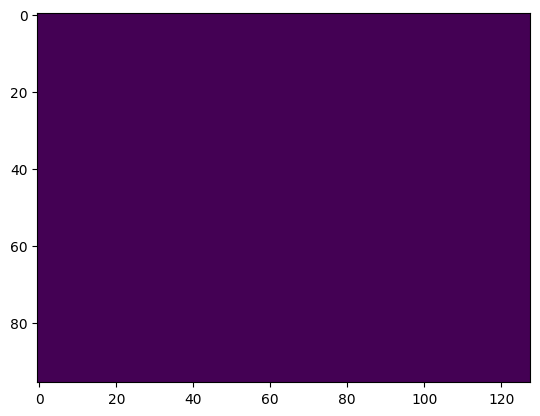

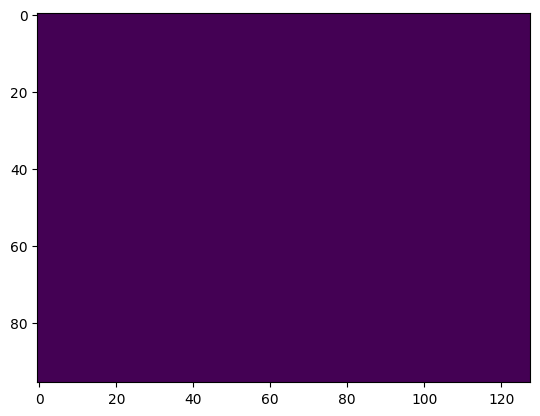

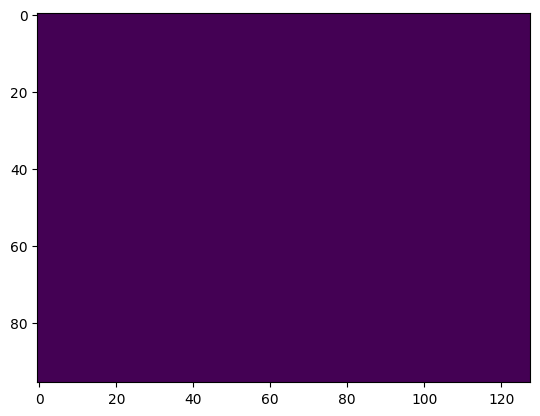

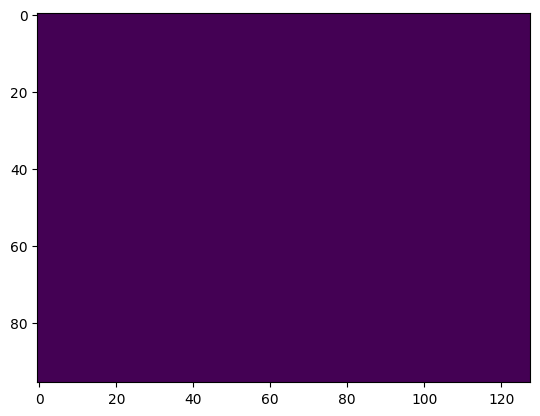

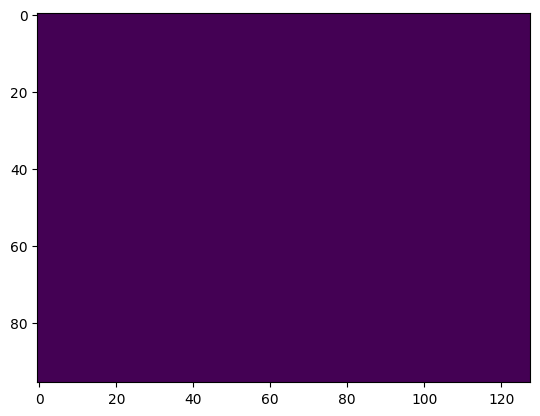

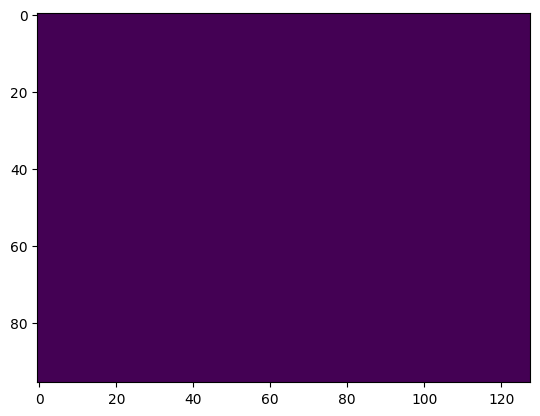

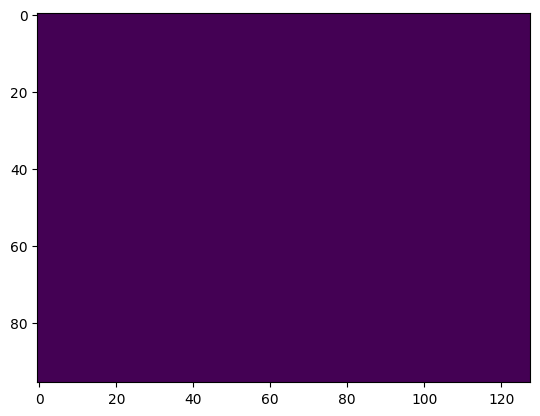

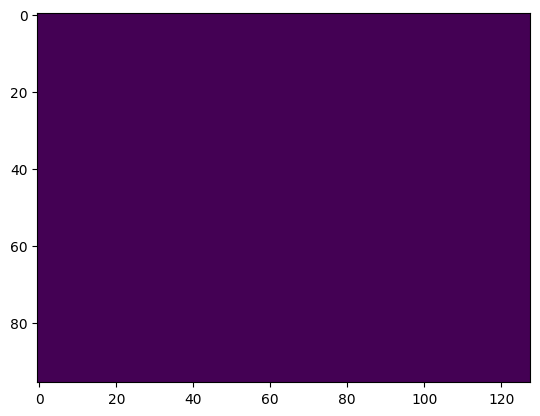

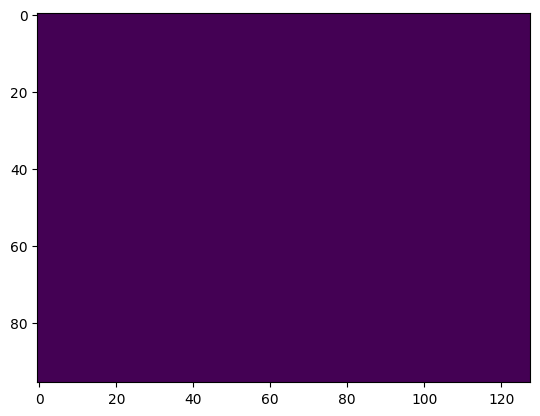

In [33]:
mask = np.zeros_like(predictions)
mask = predictions
mask[predictions < 0.1] = 0
# mask[predictions > 0.2] = 1

for i in range(len(predictions)):
    plt.imshow(mask[i].squeeze(axis=-1))
    plt.show()